# Study 1: Online experiment

## Libraries

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
import seaborn as sns
#from curlyBrace import curlyBrace
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Print library versions
print("numpy version: " + str(np.__version__))
print("pandas version: " + str(pd.__version__))
print("scipy version: " + str(scipy.__version__))
print("statsmodels version: " + str(sm.__version__))
print("matplotlib version: " + str(matplotlib.__version__))
print("seaborn version: " + str(sns.__version__))
print("matplotlib version: " + str(matplotlib.__version__))

numpy version: 1.24.3
pandas version: 1.5.3
scipy version: 1.11.1
statsmodels version: 0.14.0
matplotlib version: 3.7.1
seaborn version: 0.12.2
matplotlib version: 3.7.1


## Study data

In [3]:
# Import study data (excluding dropouts)
data = pd.read_csv("data_study_01.csv")

In [4]:
# Print columns names
print(data.columns)

Index(['treatment', 'completed_images', 'balanced_accuracy', 'precision',
       'defect_detection_rate', 'adherence_accurate_prediction',
       'overrule_wrong_prediction', 'median_decision_speed', 'it_skills',
       'age', 'education', 'gender'],
      dtype='object')


In [5]:
# Rename treatment arms to "a", "b", and "c"
data["treatment"][data["treatment"]=="human_with_black-box_AI"] = "a"
data["treatment"][data["treatment"]=="human_with_explainable_AI"] = "b"
data["treatment"][data["treatment"]=="human_without_AI"] = "c"

In [6]:
# Print number of participants who completed the study
print("Number of participants who completed the study: " + str(data.shape[0]))

Number of participants who completed the study: 592


In [7]:
# Remove participants who did not complete experiment
data = data[data["completed_images"]==200]

In [8]:
# Print number of participants who completed the study on time
print("Number of participants who completed the study within 35 minutes: " + str(data.shape[0]))

Number of participants who completed the study within 35 minutes: 500


In [9]:
# Remove participants who did not label a single product as defective
data = data[data["defect_detection_rate"]>0]

In [10]:
# Remove participants whose performance was more than three standard deviations worse than the mean of their respective treatment arm
cutoff_a = data["balanced_accuracy"][data["treatment"]=="a"].mean() - 3*data["balanced_accuracy"][data["treatment"] == "a"].std()
cutoff_b = data["balanced_accuracy"][data["treatment"]=="b"].mean() - 3*data["balanced_accuracy"][data["treatment"] == "b"].std()
cutoff_c = data["balanced_accuracy"][data["treatment"]=="c"].mean() - 3*data["balanced_accuracy"][data["treatment"] == "c"].std()
data = data[~((data["treatment"]=="a") & (data["balanced_accuracy"]<cutoff_a))]
data = data[~((data["treatment"]=="b") & (data["balanced_accuracy"]<cutoff_b))]
data = data[~((data["treatment"]=="c") & (data["balanced_accuracy"]<cutoff_c))]

In [11]:
# Print number of participants in the final sample
print("Number of participants in the final sample: " + str(data.shape[0]))

Number of participants in the final sample: 430


In [12]:
# Print number of participants per treatment arm
print("Number of participants with black-box AI treatment: " + str(data[data["treatment"]=="a"].shape[0]))
print("Number of participants with explainable AI treatment: " + str(data[data["treatment"]=="b"].shape[0]))
print("Number of participants with no AI treatment: " + str(data[data["treatment"]=="c"].shape[0]))

Number of participants with black-box AI treatment: 151
Number of participants with explainable AI treatment: 137
Number of participants with no AI treatment: 142


## Study results 

### Boxplots for balanced accuracy

In [13]:
plt.rcParams["font.family"] = "Arial"
#plt.rcParams["font.serif"] = ["Times New Roman"]
plt.rcParams['font.size'] = 24
plt.rcParams['figure.figsize'] = (12, 10)
plt.rcParams['mathtext.fontset'] = 'stix'

font = {  #'family': 'serif',
    #'fontname': 'Times New Roman',
    #'style': 'italic',
    'size': 20,
}

In [14]:
# Define colors
red = (0.59,0.0,0.09)
blue = (0.09,0.43,0.61)
orange = (0.8,0.33,0)
grey = (0.66,0.66,0.66)

In [15]:
ai_bacc = 0.956
ai_ddr = 0.929
ai_prec = 26/29

t-stat: -3.605, P-val: 0.0002


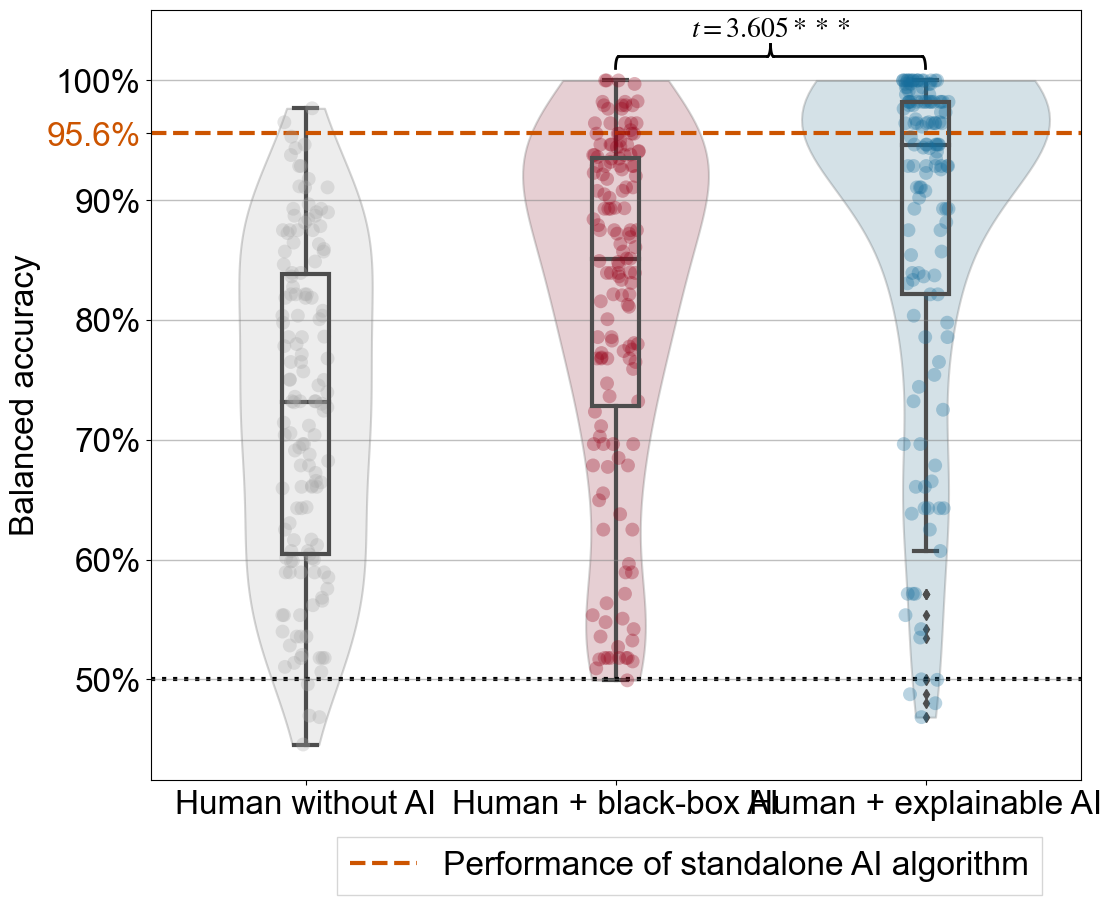

In [16]:
# Plot balanced accuracy for all participants
# Calculate t-statistic and p-value
t_stat = stats.ttest_ind(data["balanced_accuracy"][data["treatment"]=="a"], data["balanced_accuracy"][data["treatment"]=="b"], equal_var = False)[0]
p_val = stats.ttest_ind(data["balanced_accuracy"][data["treatment"]=="a"], data["balanced_accuracy"][data["treatment"]=="b"], equal_var = False)[1]/2
if p_val < 0.001:
    ast = '***'
elif p_val < 0.01:
    ast = '**'
elif p_val < 0.05:
    ast = '*'
else:
    ast = ' '
print("t-stat: " + str(round(t_stat,3))+ ", P-val: " + str(round(p_val,4)))
fig = plt.figure()
ax = sns.violinplot(x="treatment", y="balanced_accuracy", data=data, inner=None, palette=[grey, red, blue], alpha=0.4, cut=0, order=["c", "a", "b"])
for art in ax.collections:
    art.set_alpha(0.2)
ax1 = sns.boxplot(x="treatment", y="balanced_accuracy", data=data, orient="v", width=0.15, color="grey", linewidth=3, boxprops={'facecolor':'none', "zorder":10}, order=["c", "a", "b"])
ax1 = sns.stripplot(x="treatment", y="balanced_accuracy", data=data, palette=[grey, red, blue], size=10, jitter=0.075, order=["c", "a", "b"], alpha=0.3)
#plt.scatter(0, data[data['treatment'] == 'a']['balanced_accuracy'].mean(), marker='s', color='black', s=50, alpha=0.6)
#plt.scatter(1, data[data['treatment'] == 'b']['balanced_accuracy'].mean(), marker='s', color='black', s=50, alpha=0.6, label='Mean')
plt.hlines(ai_bacc, -0.5, 2.5, linestyles='--', color=orange, linewidth=3, alpha=1, label='Performance of standalone AI algorithm')
plt.hlines(0.5, -0.5, 2.5, linestyles='dotted', color='black', linewidth=3, alpha=1)
for i in np.arange(0.5, 1.09, 0.1):
    plt.hlines(i, -0.5, 2.5, color='grey', linewidth=1, alpha=0.5)
plt.xticks([0, 1, 2], ["Human without AI", "Human + black-box AI", "Human + explainable AI"])
plt.yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1, ai_bacc], labels=['50%', '60%', '70%', '80%', '90%', '100%', f'{np.round(ai_bacc*100, 1)}%'])
plt.xlabel("")
plt.xlim(-0.5, 2.5)
plt.ylabel("Balanced accuracy")
plt.legend(loc=(0.2, -0.15), fancybox=False)
ax.get_yticklabels()[-1].set_color((0.8,0.33,0))
brace_y_offset = data['balanced_accuracy'].max() + 0.01
curlyBrace(fig, ax, [1, brace_y_offset], [2, brace_y_offset], 0.01, bool_auto=False, str_text=f'$t={np.round(np.abs(t_stat),3)}{ast}$', color='black', lw=2, int_line_num=1, fontdict=font)
plt.savefig('../results/results_balanced_accuracy_study1.pdf', bbox_inches='tight')

### Statistical test for balanced accuracy

t-stat: -3.605, P-val: 0.0002
t-stat: -3.447, P-val: 0.0003


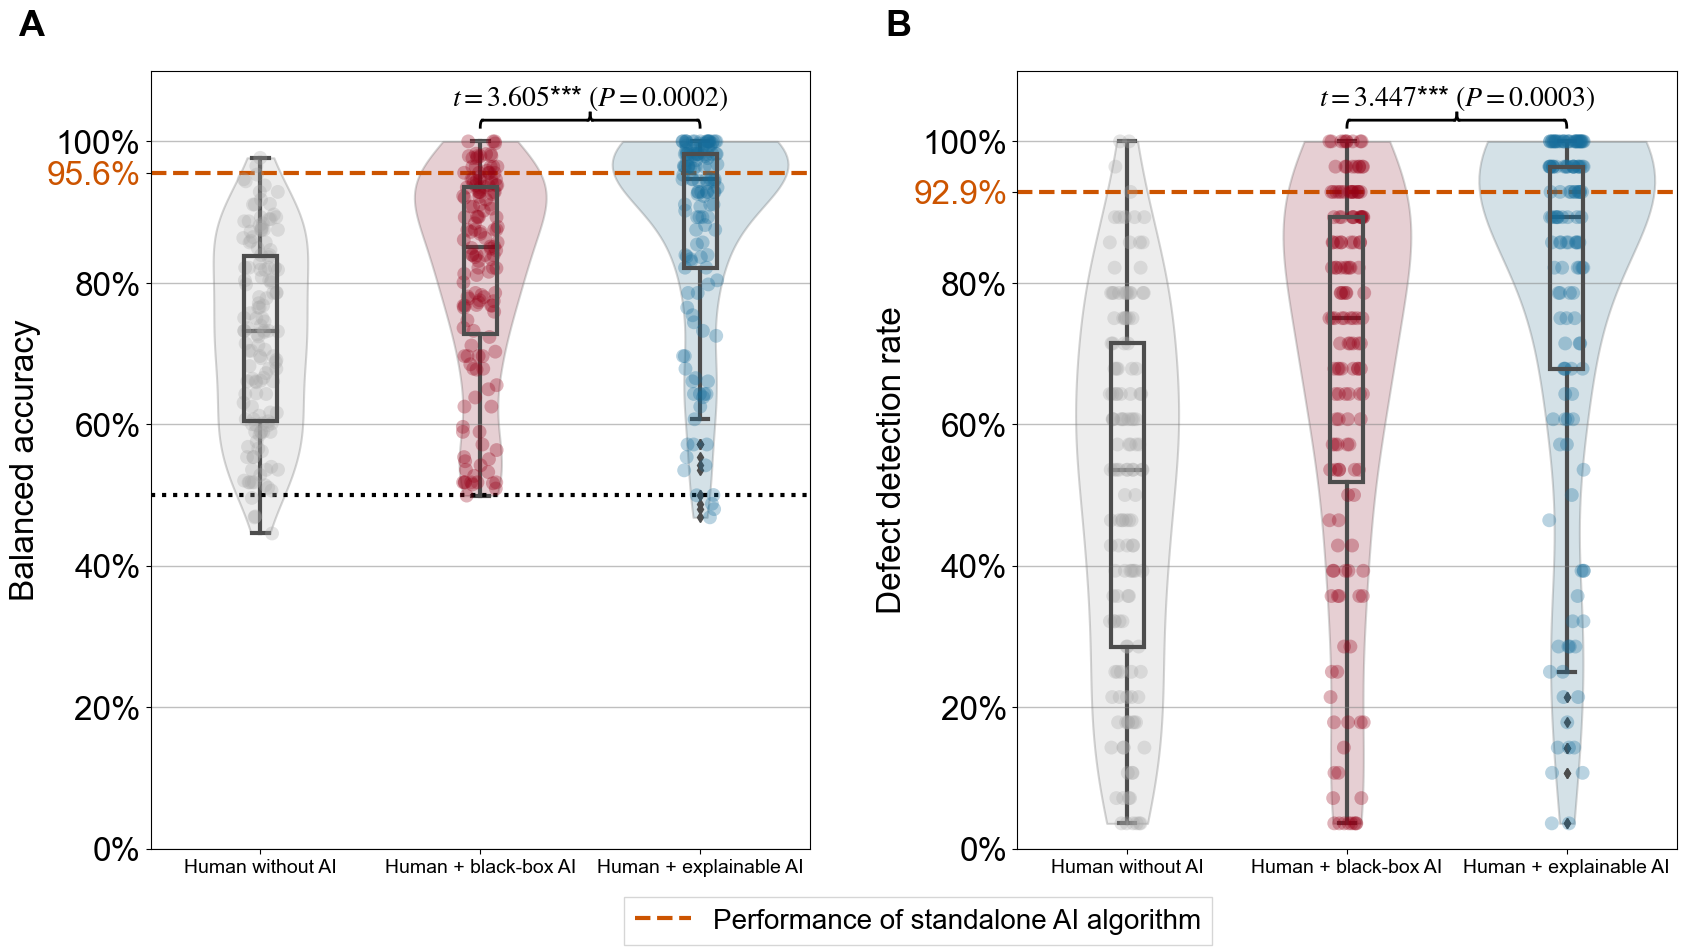

In [26]:
# Plot balanced accuracy and disease detection rate for all participants
# Calculate t-statistic and p-value
plt.figure(figsize=(18, 10))
for metric in ['balanced_accuracy', 'defect_detection_rate']:
    if metric == 'balanced_accuracy':
        ai_metric = ai_bacc
        plot_id = 1
        label = 'Balanced accuracy'
        legend = 'Performance of standalone AI algorithm'
    elif metric == 'defect_detection_rate':
        ai_metric = ai_ddr
        plot_id = 2
        label = 'Defect detection rate'
        legend = None
    else:
        raise ValueError('Unknown metric', metric)
    plt.subplot(1, 2, plot_id)
    t_stat = stats.ttest_ind(data[metric][data["treatment"]=="a"], data[metric][data["treatment"]=="b"], equal_var = False)[0]
    p_val = stats.ttest_ind(data[metric][data["treatment"]=="a"], data[metric][data["treatment"]=="b"], equal_var = False)[1]/2
    if p_val < 0.001:
        ast = '***'
    elif p_val < 0.01:
        ast = '**'
    elif p_val < 0.05:
        ast = '*'
    else:
        ast = ' '
    print("t-stat: " + str(round(t_stat,3))+ ", P-val: " + str(round(p_val,4)))
    #fig = plt.figure()
    ax = sns.violinplot(x="treatment", y=metric, data=data, inner=None, palette=[grey, red, blue], alpha=0.4, cut=0, order=["c", "a", "b"])
    for art in ax.collections:
        art.set_alpha(0.2)
    ax1 = sns.boxplot(x="treatment", y=metric, data=data, orient="v", width=0.15, color="grey", linewidth=3, boxprops={'facecolor':'none', "zorder":10}, order=["c", "a", "b"])
    ax1 = sns.stripplot(x="treatment", y=metric, data=data, palette=[grey, red, blue], size=10, jitter=0.08, order=["c", "a", "b"], alpha=0.3)
    #plt.scatter(0, data[data['treatment'] == 'a']['balanced_accuracy'].mean(), marker='s', color='black', s=50, alpha=0.6)
    #plt.scatter(1, data[data['treatment'] == 'b']['balanced_accuracy'].mean(), marker='s', color='black', s=50, alpha=0.6, label='Mean')
    plt.hlines(ai_metric, -0.5, 2.5, linestyles='--', color=orange, linewidth=3, alpha=1, label=legend)
    if metric == 'balanced_accuracy':
        plt.hlines(0.5, -0.5, 2.5, linestyles='dotted', color='black', linewidth=3, alpha=1)
    for i in np.arange(0, 1.09, 0.2):
        plt.hlines(i, -0.5, 2.5, color='grey', linewidth=1, alpha=0.5)
    plt.xticks([0, 1, 2], ["Human without AI", "Human + black-box AI", "Human + explainable AI"], fontsize=14)
    plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1, ai_metric], labels=['0%', '20%', '40%', '60%', '80%', '100%', f'{np.round(ai_metric*100, 1)}%'])
    plt.xlabel(None)
    plt.ylabel(label)
    plt.xlim(-0.5, 2.5)
    plt.ylim(0, 1.1)
    #plt.title(label)
    ax.get_yticklabels()[-1].set_color((0.8,0.33,0))
    brace_y_offset = data[metric].max() + 0.01
    curlyBrace(fig, ax, [1, 1.02], [2, 1.02], 0.01, bool_auto=False, str_text=f'$t={np.round(np.abs(t_stat),3)}$'+ f'{ast}'+ f'$\, \, (P={np.round(p_val, 4)})$', color='black', lw=2, int_line_num=1, fontdict=font)
    #if plot_id == 1:
    #    plt.legend(loc=(0.4, -0.15))
    if metric == 'balanced_accuracy':
        plt.text(-1.1, 1.15, 'A', weight='bold', fontsize=26)
    else:
        plt.text(-1.1, 1.15, 'B', weight='bold', fontsize=26)
plt.figlegend(loc=(0.37, 0.004), fancybox=False, fontsize=20)
plt.tight_layout(pad=2)
plt.savefig('../results/results_combined_study1.pdf', bbox_inches='tight')

In [19]:
# Print mean balanced accuracy for treatment arms
print("Treatment a: " + str(round(data["balanced_accuracy"][data["treatment"]=="a"].mean()*100,1)))
print("Treatment b: " + str(round(data["balanced_accuracy"][data["treatment"]=="b"].mean()*100,1)))
print("Treatment c: " + str(round(data["balanced_accuracy"][data["treatment"]=="c"].mean()*100,1)))

Treatment a: 81.4
Treatment b: 87.6
Treatment c: 72.4


t-stat: -3.605, P-val: 0.0002


Text(-0.75, 1.08, 'B')

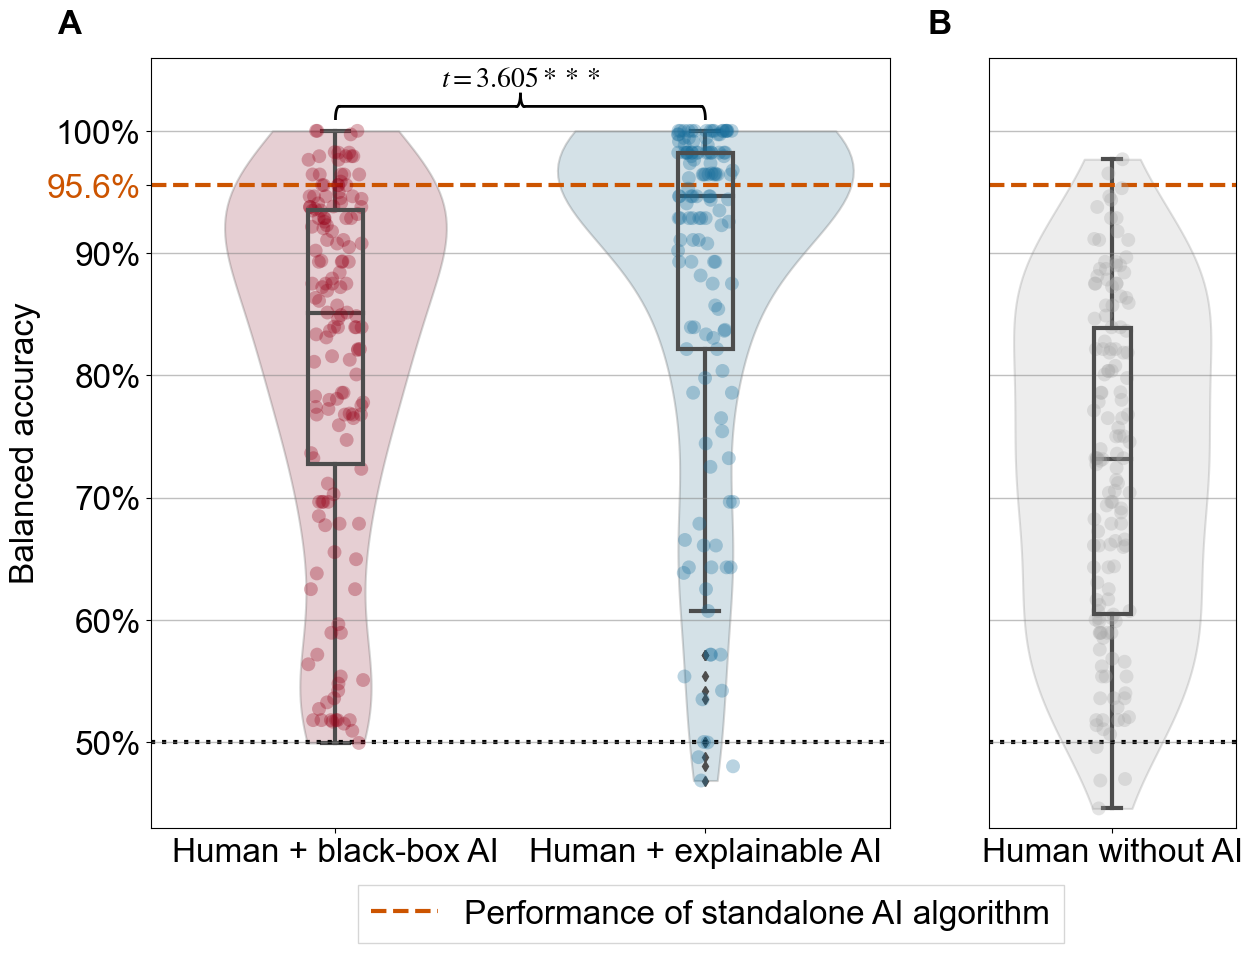

In [17]:
# Plot balanced accuracy for all participants
# Calculate t-statistic and p-value
t_stat = stats.ttest_ind(data["balanced_accuracy"][data["treatment"]=="a"], data["balanced_accuracy"][data["treatment"]=="b"], equal_var = False)[0]
p_val = stats.ttest_ind(data["balanced_accuracy"][data["treatment"]=="a"], data["balanced_accuracy"][data["treatment"]=="b"], equal_var = False)[1]/2
if p_val < 0.001:
    ast = '***'
elif p_val < 0.01:
    ast = '**'
elif p_val < 0.05:
    ast = '*'
else:
    ast = ' '
print("t-stat: " + str(round(t_stat,3))+ ", P-val: " + str(round(p_val,4)))

# Human with AI plots
f, (a0, a1) = plt.subplots(1, 2, width_ratios=[3, 1], figsize=(14,10))
plt.subplot(1, 2, 1)
ax = sns.violinplot(x="treatment", y="balanced_accuracy", data=data, inner=None, palette=[red, blue], alpha=0.4, cut=0, order=["a", "b"])
for art in ax.collections:
    art.set_alpha(0.2)
ax1 = sns.boxplot(x="treatment", y="balanced_accuracy", data=data, orient="v", width=0.15, color="grey", linewidth=3, boxprops={'facecolor':'none', "zorder":10}, order=["a", "b"])
ax1 = sns.stripplot(x="treatment", y="balanced_accuracy", data=data, palette=[red, blue], size=10, jitter=0.075, order=["a", "b"], alpha=0.3)
#plt.scatter(0, data[data['treatment'] == 'a']['balanced_accuracy'].mean(), marker='s', color='black', s=50, alpha=0.6)
#plt.scatter(1, data[data['treatment'] == 'b']['balanced_accuracy'].mean(), marker='s', color='black', s=50, alpha=0.6, label='Mean')
plt.hlines(ai_bacc, -0.5, 1.5, linestyles='--', color=orange, linewidth=3, alpha=1, label='Performance of standalone AI algorithm')
plt.hlines(0.5, -0.5, 1.5, linestyles='dotted', color='black', linewidth=3, alpha=1)
for i in np.arange(0.5, 1.09, 0.1):
    plt.hlines(i, -0.5, 1.5, color='grey', linewidth=1, alpha=0.5)
plt.xticks([0, 1], ["Human + black-box AI", "Human + explainable AI"])
plt.yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1, ai_bacc], labels=['50%', '60%', '70%', '80%', '90%', '100%', f'{np.round(ai_bacc*100, 1)}%'])
plt.xlabel("")
plt.xlim(-0.5, 1.5)
plt.ylim(0.43, 1.06)
plt.text(-0.75, 1.08, 'A', weight='bold')
plt.ylabel("Balanced accuracy")
plt.legend(loc=(0.28, -0.15), fancybox=False)
ax.get_yticklabels()[-1].set_color((0.8,0.33,0))
brace_y_offset = data['balanced_accuracy'].max() + 0.01
curlyBrace(fig, ax, [0, brace_y_offset], [1, brace_y_offset], 0.01, bool_auto=False, str_text=f'$t={np.round(np.abs(t_stat),3)}{ast}$', color='black', lw=2, int_line_num=1, fontdict=font)

# Human without AI plot
plt.subplot(1, 2, 2)
ax = sns.violinplot(x="treatment", y="balanced_accuracy", data=data, inner=None, palette=[grey], alpha=0.4, cut=0, order=["c"])
for art in ax.collections:
    art.set_alpha(0.2)
ax1 = sns.boxplot(x="treatment", y="balanced_accuracy", data=data, orient="v", width=0.15, color="grey", linewidth=3, boxprops={'facecolor':'none', "zorder":10}, order=["c"])
ax1 = sns.stripplot(x="treatment", y="balanced_accuracy", data=data[data["treatment"] == "c"], palette=[grey], size=10, jitter=0.075, alpha=0.3)
#plt.scatter(0, data[data['treatment'] == 'a']['balanced_accuracy'].mean(), marker='s', color='black', s=50, alpha=0.6)
#plt.scatter(1, data[data['treatment'] == 'b']['balanced_accuracy'].mean(), marker='s', color='black', s=50, alpha=0.6, label='Mean')
plt.hlines(ai_bacc, -0.5, 0.5, linestyles='--', color=orange, linewidth=3, alpha=1, label='Performance of standalone AI algorithm')
plt.hlines(0.5, -0.5, 0.5, linestyles='dotted', color='black', linewidth=3, alpha=1)
for i in np.arange(0.5, 1.09, 0.1):
    plt.hlines(i, -0.5, 0.5, color='grey', linewidth=1, alpha=0.5)
plt.xticks([0], ["Human without AI"])
plt.yticks([])
plt.ylabel(None)
plt.xlabel(None)
plt.xlim(-0.5, 0.5)
plt.ylim(0.43, 1.06)
plt.text(-0.75, 1.08, 'B', weight='bold')
#plt.savefig('../results/results_balanced_accuracy_study1.pdf', bbox_inches='tight')

In [20]:
# Calculate difference in means
np.round(data["balanced_accuracy"][data["treatment"]=="b"].mean()*100 - data["balanced_accuracy"][data["treatment"]=="a"].mean()*100, 1)

6.3

In [21]:
# Print median balanced accuracy for treatment arms
print("Treatment a: " + str(round(data["balanced_accuracy"][data["treatment"]=="a"].median()*100,1)))
print("Treatment b: " + str(round(data["balanced_accuracy"][data["treatment"]=="b"].median()*100,1)))
print("Treatment c: " + str(round(data["balanced_accuracy"][data["treatment"]=="c"].median()*100,1)))

Treatment a: 85.1
Treatment b: 94.6
Treatment c: 73.2


In [22]:
# One-sided Welch's t-test for balanced accuracy ("human + black-box AI" vs. "human + explainable AI")
t_stat = stats.ttest_ind(data["balanced_accuracy"][data["treatment"]=="a"], data["balanced_accuracy"][data["treatment"]=="b"], equal_var = False)[0]
p_val = stats.ttest_ind(data["balanced_accuracy"][data["treatment"]=="a"], data["balanced_accuracy"][data["treatment"]=="b"], equal_var = False)[1]/2
print("t-stat: " + str(round(t_stat,3))+ ", P-val: " + str(round(p_val,4)))

t-stat: -3.605, P-val: 0.0002


In [23]:
# One-sided Welch's t-test for balanced accuracy ("human + black-box AI" vs. "human without AI")
t_stat = stats.ttest_ind(data["balanced_accuracy"][data["treatment"]=="a"], data["balanced_accuracy"][data["treatment"]=="c"], equal_var = False)[0]
p_val = stats.ttest_ind(data["balanced_accuracy"][data["treatment"]=="a"], data["balanced_accuracy"][data["treatment"]=="c"], equal_var = False)[1]/2
print("t-stat: " + str(round(t_stat,3))+ ", P-val: " + str(round(p_val,4)))

t-stat: 5.507, P-val: 0.0


In [24]:
# One-sided Welch's t-test for balanced accuracy ("human + explainable AI" vs. "human without AI")
t_stat = stats.ttest_ind(data["balanced_accuracy"][data["treatment"]=="b"], data["balanced_accuracy"][data["treatment"]=="c"], equal_var = False)[0]
p_val = stats.ttest_ind(data["balanced_accuracy"][data["treatment"]=="b"], data["balanced_accuracy"][data["treatment"]=="c"], equal_var = False)[1]/2
print("t-stat: " + str(round(t_stat,3))+ ", P-val: " + str(round(p_val,4)))

t-stat: 9.017, P-val: 0.0


### OLS Regression for balanced accuracy

In [25]:
# OLS regression model without control variables
X = data.loc[:,["treatment"]]
X = X[X["treatment"] != "c"]
X["treatment"] = np.where(X["treatment"] == "a", 0, 1)
X = sm.add_constant(X)
X = X.astype(float)
y = data.loc[:, "balanced_accuracy"].astype(float)*100
y = y.loc[X.index]
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      balanced_accuracy   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     13.01
Date:                Tue, 16 Apr 2024   Prob (F-statistic):           0.000365
Time:                        15:58:37   Log-Likelihood:                -1181.5
No. Observations:                 288   AIC:                             2367.
Df Residuals:                     286   BIC:                             2374.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         81.3956      1.195     68.095      0.0

### OLS Regression for defect detection rate

In [16]:
# OLS regression model without control variables
X = data.loc[:,["treatment"]]
X = X[X["treatment"] != "c"]
X["treatment"] = np.where(X["treatment"] == "a", 0, 1)
X = sm.add_constant(X)
X = X.astype(float)
y = data.loc[:, "defect_detection_rate"].astype(float)*100
y = y.loc[X.index]
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                              OLS Regression Results                             
Dep. Variable:     defect_detection_rate   R-squared:                       0.040
Model:                               OLS   Adj. R-squared:                  0.036
Method:                    Least Squares   F-statistic:                     11.83
Date:                   Mon, 27 May 2024   Prob (F-statistic):           0.000669
Time:                           17:04:51   Log-Likelihood:                -1364.9
No. Observations:                    288   AIC:                             2734.
Df Residuals:                        286   BIC:                             2741.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         66.4144 

### Analysis of adherence to accurate predictions

In [26]:
# Print mean values for how often participants follow accurate predictions ("human + black-box AI" vs. "human + explainable AI")
print(round(data["adherence_accurate_prediction"][data["treatment"]=="a"].mean()*100,1))
print(round(data["adherence_accurate_prediction"][data["treatment"]=="b"].mean()*100,1))

92.9
95.2


In [27]:
# One-sided Welch's t-test for how often participants follow accurate predictions ("human + black-box AI" vs. "human + explainable AI")
t_stat = stats.ttest_ind(data["adherence_accurate_prediction"][data["treatment"]=="a"], data["adherence_accurate_prediction"][data["treatment"]=="b"], equal_var = False)[0]
p_val = stats.ttest_ind(data["adherence_accurate_prediction"][data["treatment"]=="a"], data["adherence_accurate_prediction"][data["treatment"]=="b"], equal_var = False)[1]/2
print("t-stat: " + str(round(t_stat,3))+ ", P-val: " + str(round(p_val,4)))

t-stat: -2.377, P-val: 0.0091


### Analysis of overruling of wrong predictions

In [28]:
# Print mean values for how often participants overrule wrong predictions ("human + black-box AI" vs. "human + explainable AI")
print(round(data["overrule_wrong_prediction"][data["treatment"]=="a"].mean()*100,1))
print(round(data["overrule_wrong_prediction"][data["treatment"]=="b"].mean()*100,1))

65.8
79.1


In [29]:
# One-sided Welch's t-test for how often participants overrule wrong predictions ("human + explainable AI" vs. "human without AI")
t_stat = stats.ttest_ind(data["overrule_wrong_prediction"][data["treatment"]=="a"], data["overrule_wrong_prediction"][data["treatment"]=="b"], equal_var = False)[0]
p_val = stats.ttest_ind(data["overrule_wrong_prediction"][data["treatment"]=="a"], data["overrule_wrong_prediction"][data["treatment"]=="b"], equal_var = False)[1]/2
print("t-stat: " + str(round(t_stat, 3))+ ", P-val: " + str(round(p_val, 4)))

t-stat: -4.563, P-val: 0.0


### Analysis of decision speed

In [30]:
# Print mean values for participants' median decision speed ("human + black-box AI" vs. "human + explainable AI")
print(round(data["median_decision_speed"][data["treatment"]=="a"].mean(),2))
print(round(data["median_decision_speed"][data["treatment"]=="b"].mean(),2))

4.61
4.5


In [31]:
# One-sided Welch's t-test for participants' median decision speed  ("human + black-box AI" vs. "human + explainable AI")
t_stat = stats.ttest_ind(data["median_decision_speed"][data["treatment"]=="a"], data["median_decision_speed"][data["treatment"]=="b"], equal_var = False)[0]
p_val = stats.ttest_ind(data["median_decision_speed"][data["treatment"]=="a"], data["median_decision_speed"][data["treatment"]=="b"], equal_var = False)[1]/2
print("t-stat: " + str(round(t_stat,3))+ ", P-val: " + str(round(p_val,4)))

t-stat: 0.584, P-val: 0.2799


## Supplement C: Preregistered hypotheses

### Hypothesis H0: Black-box AI improves the overall task performance (measured by the balanced accuracy and defect detection rate) compared to humans without AI (i.e., manual inspection).

In [32]:
# One-sided Welch's t-test for balanced accuracy ("human + black-box AI" vs. "human + explainable AI")
t_stat = stats.ttest_ind(data["balanced_accuracy"][data["treatment"]=="a"], data["balanced_accuracy"][data["treatment"]=="c"], equal_var = False)[0]
p_val = stats.ttest_ind(data["balanced_accuracy"][data["treatment"]=="a"], data["balanced_accuracy"][data["treatment"]=="c"], equal_var = False)[1]/2
print("t-stat: " + str(round(t_stat,3))+ ", P-val: " + str(round(p_val,4)))

t-stat: 5.507, P-val: 0.0


In [33]:
# One-sided Welch's t-test for defect detection rate ("human + black-box AI" vs. "human + explainable AI")
t_stat = stats.ttest_ind(data["defect_detection_rate"][data["treatment"]=="a"], data["defect_detection_rate"][data["treatment"]=="c"], equal_var = False)[0]
p_val = stats.ttest_ind(data["defect_detection_rate"][data["treatment"]=="a"], data["defect_detection_rate"][data["treatment"]=="c"], equal_var = False)[1]/2
print("t-stat: " + str(round(t_stat,3))+ ", P-val: " + str(round(p_val,4)))

t-stat: 5.202, P-val: 0.0


### Hypothesis H1: Explainable AI improves the overall task performance (measured by the balanced accuracy and defect detection rate) compared to humans without AI (i.e., manual inspection).

In [34]:
# One-sided Welch's t-test for balanced accuracy ("human + black-box AI" vs. "human + explainable AI")
t_stat = stats.ttest_ind(data["balanced_accuracy"][data["treatment"]=="b"], data["balanced_accuracy"][data["treatment"]=="c"], equal_var = False)[0]
p_val = stats.ttest_ind(data["balanced_accuracy"][data["treatment"]=="b"], data["balanced_accuracy"][data["treatment"]=="c"], equal_var = False)[1]/2
print("t-stat: " + str(round(t_stat,3))+ ", P-val: " + str(round(p_val,4)))

t-stat: 9.017, P-val: 0.0


In [35]:
# One-sided Welch's t-test for defect detection rate ("human + black-box AI" vs. "human + explainable AI")
t_stat = stats.ttest_ind(data["defect_detection_rate"][data["treatment"]=="b"], data["defect_detection_rate"][data["treatment"]=="c"], equal_var = False)[0]
p_val = stats.ttest_ind(data["defect_detection_rate"][data["treatment"]=="b"], data["defect_detection_rate"][data["treatment"]=="c"], equal_var = False)[1]/2
print("t-stat: " + str(round(t_stat,3))+ ", P-val: " + str(round(p_val,4)))

t-stat: 8.733, P-val: 0.0


### Hypothesis H2: Explainable AI improves the overall task performance (measured by the balanced accuracy and defect detection rate) compared to black-box AI.

In [36]:
# One-sided Welch's t-test for balanced accuracy ("human + black-box AI" vs. "human + explainable AI")
t_stat = stats.ttest_ind(data["balanced_accuracy"][data["treatment"]=="a"], data["balanced_accuracy"][data["treatment"]=="b"], equal_var = False)[0]
p_val = stats.ttest_ind(data["balanced_accuracy"][data["treatment"]=="a"], data["balanced_accuracy"][data["treatment"]=="b"], equal_var = False)[1]/2
print("t-stat: " + str(round(t_stat,3))+ ", P-val: " + str(round(p_val,4)))

t-stat: -3.605, P-val: 0.0002


In [37]:
# One-sided Welch's t-test for defect detection rate ("human + black-box AI" vs. "human + explainable AI")
t_stat = stats.ttest_ind(data["defect_detection_rate"][data["treatment"]=="a"], data["defect_detection_rate"][data["treatment"]=="b"], equal_var = False)[0]
p_val = stats.ttest_ind(data["defect_detection_rate"][data["treatment"]=="a"], data["defect_detection_rate"][data["treatment"]=="b"], equal_var = False)[1]/2
print("t-stat: " + str(round(t_stat,3))+ ", P-val: " + str(round(p_val,4)))

t-stat: -3.447, P-val: 0.0003


### Hypothesis H3: Explainable AI reduces variation in task performance (measured by the variance in the balanced accuracy and defect detection rate) compared to black-box AI.

In [38]:
# Levene's test for balanced accuracy ("human + black-box AI" vs. "human + explainable AI")
W_stat = stats.levene(data["balanced_accuracy"][data["treatment"]=="a"], data["balanced_accuracy"][data["treatment"]=="b"])[0]
p_val = stats.levene(data["balanced_accuracy"][data["treatment"]=="a"], data["balanced_accuracy"][data["treatment"]=="b"])[1]
print("W-stat: " + str(round(W_stat,3))+ ", P-val: " + str(round(p_val,4)))

W-stat: 0.854, P-val: 0.3562


In [39]:
# Levene's test for defect detection rate ("human + black-box AI" vs. "human + explainable AI")
W_stat = stats.levene(data["defect_detection_rate"][data["treatment"]=="a"], data["defect_detection_rate"][data["treatment"]=="b"])[0]
p_val = stats.levene(data["defect_detection_rate"][data["treatment"]=="a"], data["defect_detection_rate"][data["treatment"]=="b"])[1]
print("W-stat: " + str(round(W_stat,3))+ ", P-val: " + str(round(p_val,4)))

W-stat: 1.531, P-val: 0.217


### Hypothesis H4: Explainable AI increases the trust in model decisions (measured by the rate of correct model decisions that are not overruled by the user) compared to black-box AI.

In [40]:
# Print mean values for how often participants follow accurate predictions ("human + black-box AI" vs. "human + explainable AI")
t_stat = stats.ttest_ind(data["adherence_accurate_prediction"][data["treatment"]=="a"], data["adherence_accurate_prediction"][data["treatment"]=="b"], equal_var = False)[0]
p_val = stats.ttest_ind(data["adherence_accurate_prediction"][data["treatment"]=="a"], data["adherence_accurate_prediction"][data["treatment"]=="b"], equal_var = False)[1]/2
print("t-stat: " + str(round(t_stat,3))+ ", P-val: " + str(round(p_val,4)))

t-stat: -2.377, P-val: 0.0091


## Supplement D: Results with defect detection rate and precision

t-stat: -3.447, P-val: 0.0003
t-stat: -2.946, P-val: 0.0017


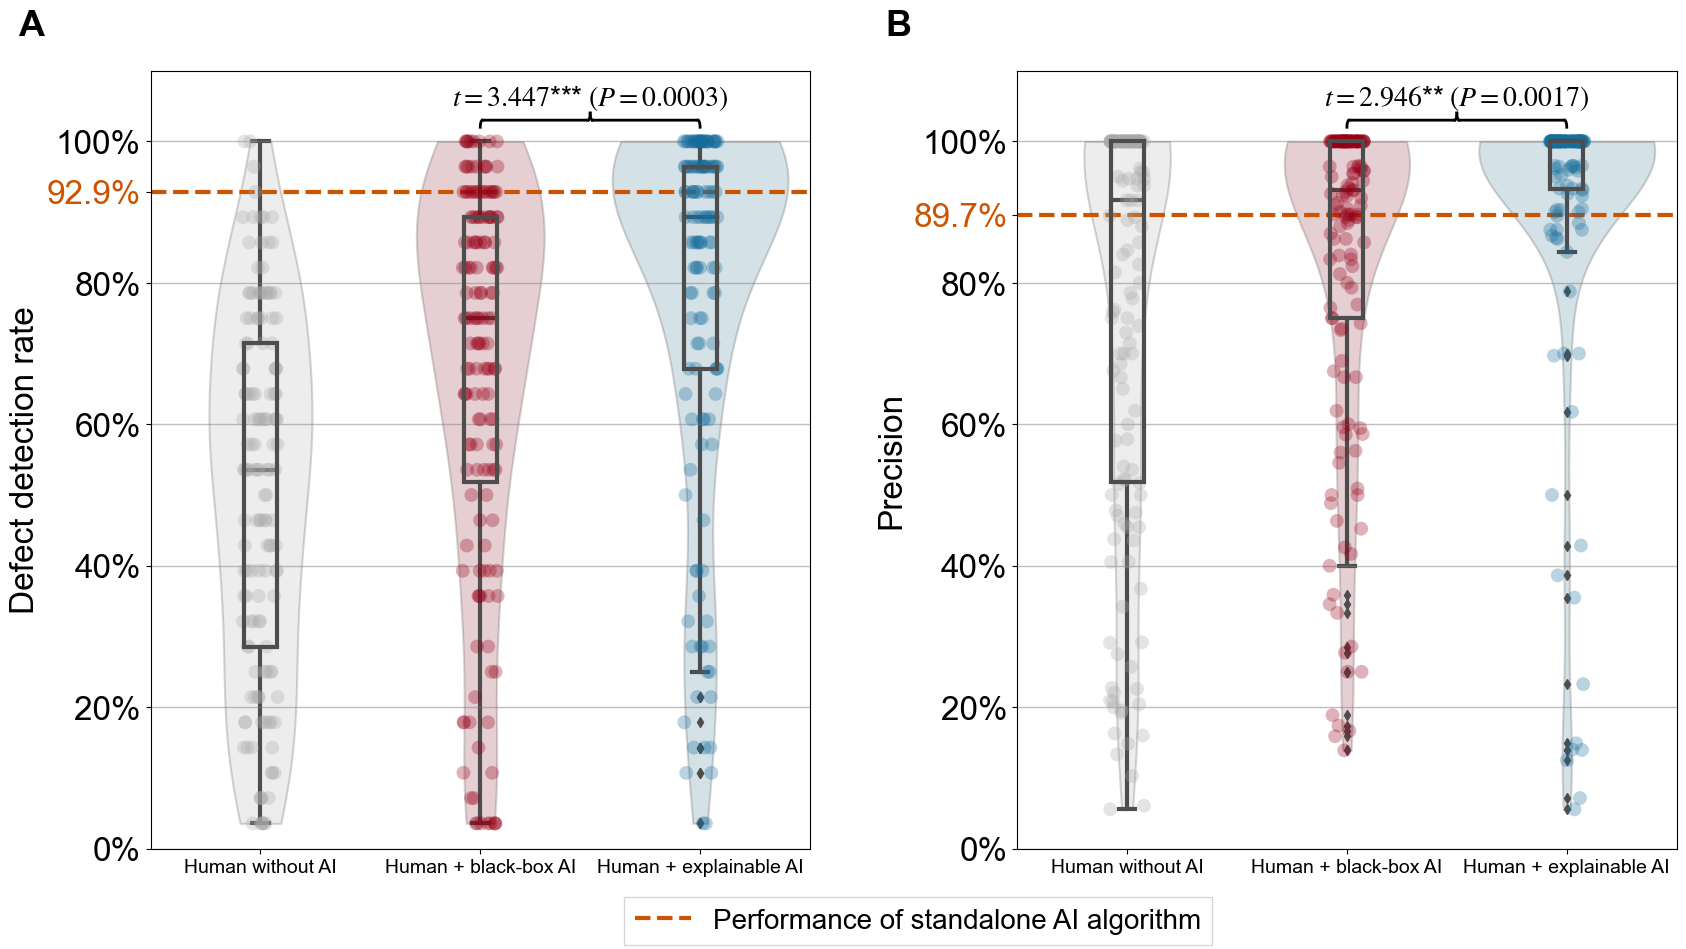

In [27]:
# Plot disease detection rate and precision for all participants
# Calculate t-statistic and p-value
plt.figure(figsize=(18, 10))
for metric in ['defect_detection_rate', 'precision']:
    if metric == 'defect_detection_rate':
        ai_metric = ai_ddr
        plot_id = 1
        label = 'Defect detection rate'
        legend = 'Performance of standalone AI algorithm'
    elif metric == 'precision':
        ai_metric = ai_prec
        plot_id = 2
        label = 'Precision'
        legend = None
    else:
        raise ValueError('Unknown metric', metric)
    plt.subplot(1, 2, plot_id)
    t_stat = stats.ttest_ind(data[metric][data["treatment"]=="a"], data[metric][data["treatment"]=="b"], equal_var = False)[0]
    p_val = stats.ttest_ind(data[metric][data["treatment"]=="a"], data[metric][data["treatment"]=="b"], equal_var = False)[1]/2
    if p_val < 0.001:
        ast = '***'
    elif p_val < 0.01:
        ast = '**'
    elif p_val < 0.05:
        ast = '*'
    else:
        ast = ' '
    print("t-stat: " + str(round(t_stat,3))+ ", P-val: " + str(round(p_val,4)))
    #fig = plt.figure()
    ax = sns.violinplot(x="treatment", y=metric, data=data, inner=None, palette=[grey, red, blue], alpha=0.4, cut=0, order=["c", "a", "b"])
    for art in ax.collections:
        art.set_alpha(0.2)
    ax1 = sns.boxplot(x="treatment", y=metric, data=data, orient="v", width=0.15, color="grey", linewidth=3, boxprops={'facecolor':'none', "zorder":10}, order=["c", "a", "b"])
    ax1 = sns.stripplot(x="treatment", y=metric, data=data, palette=[grey, red, blue], size=10, jitter=0.08, order=["c", "a", "b"], alpha=0.3)
    #plt.scatter(0, data[data['treatment'] == 'a']['balanced_accuracy'].mean(), marker='s', color='black', s=50, alpha=0.6)
    #plt.scatter(1, data[data['treatment'] == 'b']['balanced_accuracy'].mean(), marker='s', color='black', s=50, alpha=0.6, label='Mean')
    plt.hlines(ai_metric, -0.5, 2.5, linestyles='--', color=orange, linewidth=3, alpha=1, label=legend)
    if metric == 'balanced_accuracy':
        plt.hlines(0.5, -0.5, 2.5, linestyles='dotted', color='black', linewidth=3, alpha=1)
    for i in np.arange(0, 1.09, 0.2):
        plt.hlines(i, -0.5, 2.5, color='grey', linewidth=1, alpha=0.5)
    plt.xticks([0, 1, 2], ["Human without AI", "Human + black-box AI", "Human + explainable AI"], fontsize=14)
    plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1, ai_metric], labels=['0%', '20%', '40%', '60%', '80%', '100%', f'{np.round(ai_metric*100, 1)}%'])
    plt.xlabel(None)
    plt.ylabel(label)
    plt.xlim(-0.5, 2.5)
    plt.ylim(0, 1.1)
    #plt.title(label)
    ax.get_yticklabels()[-1].set_color((0.8,0.33,0))
    brace_y_offset = data[metric].max() + 0.01
    curlyBrace(fig, ax, [1, 1.02], [2, 1.02], 0.01, bool_auto=False, str_text=f'$t={np.round(np.abs(t_stat),3)}$'+ f'{ast}'+ f'$\, \, (P={np.round(p_val, 4)})$', color='black', lw=2, int_line_num=1, fontdict=font)
    #if plot_id == 1:
    #    plt.legend(loc=(0.4, -0.15))
    if metric == 'defect_detection_rate':
        plt.text(-1.1, 1.15, 'A', weight='bold', fontsize=26)
    else:
        plt.text(-1.1, 1.15, 'B', weight='bold', fontsize=26)
plt.figlegend(loc=(0.37, 0.004), fancybox=False, fontsize=20)
plt.tight_layout(pad=2)
plt.savefig('../results/results_combined_study1_supp.pdf', bbox_inches='tight')

In [42]:
# One-sided Welch's t-test for precision ("human + black-box AI" vs. "human + explainable AI")
t_stat = stats.ttest_ind(data["precision"][data["treatment"]=="a"], data["precision"][data["treatment"]=="b"], equal_var = False)[0]
p_val = stats.ttest_ind(data["precision"][data["treatment"]=="a"], data["precision"][data["treatment"]=="b"], equal_var = False)[1]/2
print("t-stat: " + str(round(t_stat,3))+ ", P-val: " + str(round(p_val,4)))

t-stat: -2.946, P-val: 0.0017


In [43]:
# Print mean precision for treatment arms
print("Treatment a: " + str(round(data["precision"][data["treatment"]=="a"].median()*100,1)))
print("Treatment b: " + str(round(data["precision"][data["treatment"]=="b"].median()*100,1)))
print("Treatment c: " + str(round(data["precision"][data["treatment"]=="c"].median()*100,1)))

Treatment a: 93.1
Treatment b: 100.0
Treatment c: 91.7


In [44]:
# Print median precision for treatment arms
print("Treatment a: " + str(round(data["precision"][data["treatment"]=="a"].mean()*100,1)))
print("Treatment b: " + str(round(data["precision"][data["treatment"]=="b"].mean()*100,1)))
print("Treatment c: " + str(round(data["precision"][data["treatment"]=="c"].mean()*100,1)))

Treatment a: 83.1
Treatment b: 90.9
Treatment c: 75.3


In [45]:
# OLS regression model without control variables
X = data.loc[:,["treatment"]]
X = X[X["treatment"] != "c"]
X["treatment"] = np.where(X["treatment"] == "a", 0, 1)
X = sm.add_constant(X)
X = X.astype(float)
y = data.loc[:, "precision"].astype(float)*100
y = y.loc[X.index]
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              precision   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     8.607
Date:                Tue, 16 Apr 2024   Prob (F-statistic):            0.00362
Time:                        15:58:38   Log-Likelihood:                -1304.4
No. Observations:                 288   AIC:                             2613.
Df Residuals:                     286   BIC:                             2620.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         83.0793      1.831     45.366      0.0

## Supplement H: Randomization checks

In [46]:
# Print frequencies for age, gender, education
print("age (counts in a): \n" + str(data["age"][data["treatment"]=="a"].value_counts().sort_index()))
print("age (counts in b): \n" + str(data["age"][data["treatment"]=="b"].value_counts().sort_index()))
print("age (counts in c): \n" + str(data["age"][data["treatment"]=="c"].value_counts().sort_index()))
print("gender (counts in a): \n" + str(data["gender"][data["treatment"]=="a"].value_counts().sort_index()))
print("gender (counts in b): \n" + str(data["gender"][data["treatment"]=="b"].value_counts().sort_index()))
print("gender (counts in c): \n" + str(data["gender"][data["treatment"]=="c"].value_counts().sort_index()))
print("education (counts in a): \n" + str(data["education"][data["treatment"]=="a"].value_counts().sort_index()))
print("education (counts in b): \n" + str(data["education"][data["treatment"]=="b"].value_counts().sort_index()))
print("education (counts in c): \n" + str(data["education"][data["treatment"]=="c"].value_counts().sort_index()))

age (counts in a): 
2    39
3    58
4    36
5    16
6     1
7     1
Name: age, dtype: int64
age (counts in b): 
2    26
3    56
4    34
5    13
6     8
Name: age, dtype: int64
age (counts in c): 
1     1
2    46
3    49
4    28
5    13
6     5
Name: age, dtype: int64
gender (counts in a): 
0    104
1     47
Name: gender, dtype: int64
gender (counts in b): 
0    86
1    51
Name: gender, dtype: int64
gender (counts in c): 
0    89
1    53
Name: gender, dtype: int64
education (counts in a): 
3     1
4    30
5    88
6    32
Name: education, dtype: int64
education (counts in b): 
3     1
4    24
5    91
6    21
Name: education, dtype: int64
education (counts in c): 
3     2
4    16
5    90
6    34
Name: education, dtype: int64


In [47]:
# Print P-values for randomization checks
print("age (P-value): " + str(round(stats.chi2_contingency(pd.concat([data["age"][data["treatment"]=="a"].value_counts(), data["age"][data["treatment"]=="b"].value_counts(), data["age"][data["treatment"]=="c"].value_counts()], axis=1).fillna(0).T)[1],3)))
print("gender (P-value): " + str(round(stats.chi2_contingency(pd.concat([data["gender"][data["treatment"]=="a"].value_counts(), data["gender"][data["treatment"]=="b"].value_counts(), data["gender"][data["treatment"]=="c"].value_counts()], axis=1).fillna(0).T)[1],3)))
print("education (P-value): " + str(round(stats.chi2_contingency(pd.concat([data["education"][data["treatment"]=="a"].value_counts(), data["education"][data["treatment"]=="b"].value_counts(), data["education"][data["treatment"]=="c"].value_counts()], axis=1).fillna(0).T)[1],3)))

age (P-value): 0.168
gender (P-value): 0.443
education (P-value): 0.278


## Supplement I: Regression models

In [48]:
# OLS regression model (1) for balanced acccuracy
X = data.loc[:,["treatment", "age", "education", "gender"]]
X = X[X["treatment"] != "c"]
X["treatment"] = np.where(X["treatment"] == "a", 0, 1)
X = sm.add_constant(X)
X = X.astype(float)
y = data.loc[:, "balanced_accuracy"].astype(float)*100
y = y.loc[X.index]
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      balanced_accuracy   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     5.278
Date:                Tue, 16 Apr 2024   Prob (F-statistic):           0.000410
Time:                        15:58:38   Log-Likelihood:                -1177.6
No. Observations:                 288   AIC:                             2365.
Df Residuals:                     283   BIC:                             2383.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         89.8701      7.479     12.017      0.0

In [49]:
results.pvalues['treatment']

0.0009151327557527785

In [50]:
# Quasi-binomial regression model (1) for balanced accuracy
model = sm.GLM(y/100, X, family=sm.families.Binomial())
results = model.fit(scale="X2")
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:      balanced_accuracy   No. Observations:                  288
Model:                            GLM   Df Residuals:                      283
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                         0.16567
Method:                          IRLS   Log-Likelihood:                -92.338
Date:                Tue, 16 Apr 2024   Deviance:                       45.646
Time:                        15:58:38   Pearson chi2:                     46.9
No. Iterations:                     7   Pseudo R-squ. (CS):            0.01193
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1007      0.580      3.625      0.0

In [51]:
results.pvalues['treatment']

0.0010020403359058557

In [52]:
# OLS regression model (1) for defect detection rate
X = data.loc[:,["treatment", "age", "education", "gender"]]
X = X[X["treatment"] != "c"]
X["treatment"] = np.where(X["treatment"] == "a", 0, 1)
X = sm.add_constant(X)
X = X.astype(float)
y = data.loc[:, "defect_detection_rate"].astype(float)*100
y = y.loc[X.index]
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                              OLS Regression Results                             
Dep. Variable:     defect_detection_rate   R-squared:                       0.062
Model:                               OLS   Adj. R-squared:                  0.049
Method:                    Least Squares   F-statistic:                     4.678
Date:                   Tue, 16 Apr 2024   Prob (F-statistic):            0.00114
Time:                           15:58:38   Log-Likelihood:                -1361.6
No. Observations:                    288   AIC:                             2733.
Df Residuals:                        283   BIC:                             2751.
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         79.5782 

In [53]:
results.pvalues['treatment']

0.0015996117257314711

In [54]:
# Quasi-binomial regression model (1) for defect detection rate
model = sm.GLM(y/100, X, family=sm.families.Binomial())
results = model.fit(scale="X2")
print(results.summary())

                   Generalized Linear Model Regression Results                   
Dep. Variable:     defect_detection_rate   No. Observations:                  288
Model:                               GLM   Df Residuals:                      283
Model Family:                   Binomial   Df Model:                            4
Link Function:                     Logit   Scale:                         0.38644
Method:                             IRLS   Log-Likelihood:                -133.30
Date:                   Tue, 16 Apr 2024   Deviance:                       115.78
Time:                           15:58:38   Pearson chi2:                     109.
No. Iterations:                        6   Pseudo R-squ. (CS):            0.02458
Covariance Type:               nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3259 

In [55]:
results.pvalues['treatment']

0.0016692661829559498

In [56]:
# OLS regression model (2) for balanced accuracy
X = data.loc[:,["treatment", "age", "education", "gender", "it_skills"]]
X = X[X["treatment"] != "c"]
X["treatment"] = np.where(X["treatment"] == "a", 0, 1)
X = sm.add_constant(X)
X = X.astype(float)
y = data.loc[:, "balanced_accuracy"].astype(float)*100
y = y.loc[X.index]
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      balanced_accuracy   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     5.049
Date:                Tue, 16 Apr 2024   Prob (F-statistic):           0.000190
Time:                        15:58:38   Log-Likelihood:                -1175.6
No. Observations:                 288   AIC:                             2363.
Df Residuals:                     282   BIC:                             2385.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         93.2494      7.634     12.215      0.0

In [57]:
results.pvalues['treatment']

0.0007966559848231193

In [58]:
# Quasi-binomial regression model (2) for balanced accuracy
model = sm.GLM(y/100, X, family=sm.families.Binomial())
results = model.fit(scale="X2")
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:      balanced_accuracy   No. Observations:                  288
Model:                            GLM   Df Residuals:                      282
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                         0.16355
Method:                          IRLS   Log-Likelihood:                -92.003
Date:                Tue, 16 Apr 2024   Deviance:                       44.977
Time:                        15:58:38   Pearson chi2:                     46.1
No. Iterations:                     7   Pseudo R-squ. (CS):            0.01422
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3741      0.597      3.979      0.0

In [59]:
results.pvalues['treatment']

0.0008103986091839823

In [60]:
# OLS regression model (2) for defect detection rate
X = data.loc[:,["treatment", "age", "education", "gender", "it_skills"]]
X = X[X["treatment"] != "c"]
X["treatment"] = np.where(X["treatment"] == "a", 0, 1)
X = sm.add_constant(X)
X = X.astype(float)
y = data.loc[:, "defect_detection_rate"].astype(float)*100
y = y.loc[X.index]
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                              OLS Regression Results                             
Dep. Variable:     defect_detection_rate   R-squared:                       0.075
Model:                               OLS   Adj. R-squared:                  0.058
Method:                    Least Squares   F-statistic:                     4.561
Date:                   Tue, 16 Apr 2024   Prob (F-statistic):           0.000513
Time:                           15:58:38   Log-Likelihood:                -1359.6
No. Observations:                    288   AIC:                             2731.
Df Residuals:                        282   BIC:                             2753.
Df Model:                              5                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.9690 

In [61]:
results.pvalues['treatment']

0.0014044163134874716

In [62]:
# Quasi-binomial regression model (2) for defect detection rate
model = sm.GLM(y/100, X, family=sm.families.Binomial())
results = model.fit(scale="X2")
print(results.summary())

                   Generalized Linear Model Regression Results                   
Dep. Variable:     defect_detection_rate   No. Observations:                  288
Model:                               GLM   Df Residuals:                      282
Model Family:                   Binomial   Df Model:                            5
Link Function:                     Logit   Scale:                         0.38132
Method:                             IRLS   Log-Likelihood:                -132.53
Date:                   Tue, 16 Apr 2024   Deviance:                       114.24
Time:                           15:58:38   Pearson chi2:                     108.
No. Iterations:                        6   Pseudo R-squ. (CS):            0.02978
Covariance Type:               nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6597 

In [63]:
results.pvalues['treatment']

0.0013631319121264777

In [64]:
# OLS regression model (3) for balanced accuracy
X = data.loc[:,["treatment", "age", "education", "gender", "it_skills", "median_decision_speed"]]
X = X[X["treatment"] != "c"]
X["treatment"] = np.where(X["treatment"] == "a", 0, 1)
X = sm.add_constant(X)
X = X.astype(float)
y = data.loc[:, "balanced_accuracy"].astype(float)*100
y = y.loc[X.index]
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      balanced_accuracy   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     5.340
Date:                Tue, 16 Apr 2024   Prob (F-statistic):           3.08e-05
Time:                        15:58:38   Log-Likelihood:                -1172.4
No. Observations:                 288   AIC:                             2359.
Df Residuals:                     281   BIC:                             2384.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    96.25

In [65]:
results.pvalues['treatment']

0.001239435552110339

In [66]:
# Quasi-binomial regression model (3) for balanced accuracy
model = sm.GLM(y/100, X, family=sm.families.Binomial())
results = model.fit(scale="X2")
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:      balanced_accuracy   No. Observations:                  288
Model:                            GLM   Df Residuals:                      281
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                         0.16361
Method:                          IRLS   Log-Likelihood:                -91.480
Date:                Tue, 16 Apr 2024   Deviance:                       43.930
Time:                        15:58:38   Pearson chi2:                     46.0
No. Iterations:                     7   Pseudo R-squ. (CS):            0.01780
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.61

In [67]:
results.pvalues['treatment']

0.0011508207022504105

In [68]:
# OLS regression model (3) for defect detection rate
X = data.loc[:,["treatment", "age", "education", "gender", "it_skills", "median_decision_speed"]]
X = X[X["treatment"] != "c"]
X["treatment"] = np.where(X["treatment"] == "a", 0, 1)
X = sm.add_constant(X)
X = X.astype(float)
y = data.loc[:, "defect_detection_rate"].astype(float)*100
y = y.loc[X.index]
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                              OLS Regression Results                             
Dep. Variable:     defect_detection_rate   R-squared:                       0.078
Model:                               OLS   Adj. R-squared:                  0.059
Method:                    Least Squares   F-statistic:                     3.988
Date:                   Tue, 16 Apr 2024   Prob (F-statistic):           0.000756
Time:                           15:58:38   Log-Likelihood:                -1359.0
No. Observations:                    288   AIC:                             2732.
Df Residuals:                        281   BIC:                             2758.
Df Model:                              6                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [69]:
results.pvalues['treatment']

0.0017733945634508302

In [70]:
# Quasi-binomial regression model (3) for defect detection rate
model = sm.GLM(y/100, X, family=sm.families.Binomial())
results = model.fit(scale="X2")
print(results.summary())

                   Generalized Linear Model Regression Results                   
Dep. Variable:     defect_detection_rate   No. Observations:                  288
Model:                               GLM   Df Residuals:                      281
Model Family:                   Binomial   Df Model:                            6
Link Function:                     Logit   Scale:                         0.38319
Method:                             IRLS   Log-Likelihood:                -132.29
Date:                   Tue, 16 Apr 2024   Deviance:                       113.76
Time:                           15:58:38   Pearson chi2:                     108.
No. Iterations:                        6   Pseudo R-squ. (CS):            0.03139
Covariance Type:               nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [71]:
results.pvalues['treatment']

0.0016555977186547

## Supplement J: Analysis with excluded participants

#### Get numbers of excluded participants per treatment arm

In [72]:
# Import study data (excluding dropouts)
data = pd.read_csv("data_study_01.csv")
# Rename treatment arms to "a" and "b"
data["treatment"][data["treatment"] == "human_with_black-box_AI"] = "a"
data["treatment"][data["treatment"] == "human_with_explainable_AI"] = "b"

In [73]:
data[data["completed_images"] != 200]["treatment"].value_counts()

human_without_AI    35
b                   31
a                   26
Name: treatment, dtype: int64

In [74]:
data = data[data["completed_images"] == 200].copy()

In [75]:
data[data["defect_detection_rate"] == 0]["treatment"].value_counts()

human_without_AI    27
b                   21
a                   21
Name: treatment, dtype: int64

In [76]:
data = data[data["defect_detection_rate"] != 0].copy()

In [77]:
data["treatment"].value_counts()

a                   151
human_without_AI    142
b                   138
Name: treatment, dtype: int64

In [78]:
# Remove participants whose performance was more than three standard deviations worse than the mean of their respective treatment arm
cutoff_a = data["balanced_accuracy"][data["treatment"] == "a"].mean() - 3 * data["balanced_accuracy"][
    data["treatment"] == "a"].std()
cutoff_b = data["balanced_accuracy"][data["treatment"] == "b"].mean() - 3 * data["balanced_accuracy"][
    data["treatment"] == "b"].std()
data = data[~((data["treatment"] == "a") & (data["balanced_accuracy"] < cutoff_a))]
data = data[~((data["treatment"] == "b") & (data["balanced_accuracy"] < cutoff_b))]

In [79]:
data["treatment"].value_counts()

a                   151
human_without_AI    142
b                   137
Name: treatment, dtype: int64

#### Perform OLS with all combinations of exclusion criteria

In [15]:
from itertools import combinations

# Import study data (excluding dropouts)
data = pd.read_csv("data_study_01.csv")
# Rename treatment arms to "a" and "b"
data["treatment"][data["treatment"] == "human_with_black-box_AI"] = "a"
data["treatment"][data["treatment"] == "human_with_explainable_AI"] = "b"
data["treatment"][data["treatment"] == "human_without_AI"] = "c"
data["time-out"] = data["completed_images"] != 200
data["single_label"] = data["defect_detection_rate"] == 0
data["worse_3sds"] = ((data["treatment"] == "a") & (data["balanced_accuracy"] < cutoff_a)) | (
        (data["treatment"] == "b") & (data["balanced_accuracy"] < cutoff_b))
excl_criteria = ['time-out', 'single_label', 'worse_3sds']
list_combinations = list()

for n in range(len(excl_criteria)):
    list_combinations += list(combinations(excl_criteria, n))

In [21]:
results_df = pd.DataFrame(data=None, index=[str(i) for i in range(1, 8)])
results_df['time-out'] = ["\\xmark", "\\cmark", "\\xmark", "\\xmark", "\\cmark", "\\cmark", "\\xmark"]
results_df['single_label'] = ["\\xmark", "\\xmark", "\\cmark", "\\xmark", "\\cmark", "\\xmark", "\\cmark"]
results_df['worse_3sds'] = ["\\xmark", "\\xmark", "\\xmark", "\\cmark", "\\xmark", "\\cmark", "\\cmark"]
for metric in ["balanced_accuracy", "defect_detection_rate"]:
    results_df.loc[:, "Observations"] = np.nan
    results_df.loc[:, metric] = np.nan
for metric in ["balanced_accuracy", "defect_detection_rate"]:
    for sample_id, combination in enumerate(list_combinations):
        data_sub = data.copy()
        for criterion in combination:
            data_sub = data_sub[~data_sub[criterion]].copy()
        #print("Model:", model_id+1)
        X = data_sub.loc[:, ["treatment"]]
        X = X[X["treatment"] != "c"]
        results_df.loc[str(int(sample_id + 1)), "Observations"] = len(X)
        X["treatment"] = np.where(X["treatment"] == "a", 0, 1)
        X = sm.add_constant(X)
        X = X.astype(float)
        y = data_sub.loc[:, metric].astype(float)*100
        y = y.loc[X.index]
        model = sm.OLS(y, X)
        results = model.fit()
        #print("Coef:", np.round(results.params["treatment"], 3), "se:", np.round(results.bse["treatment"], 3), "p:", np.round(results.pvalues["treatment"], 5))
        if results.pvalues["treatment"] < 0.001:
            ast = "***"
        elif results.pvalues["treatment"] < 0.01:
            ast = "**"
        elif results.pvalues["treatment"] < 0.05:
            ast = "*"
        else:
            ast = ""
        results_df.loc[str(int(sample_id+1)), metric] = "{:.3f}".format(np.round(results.params["treatment"], 3))+ast + " " + "({:.3f})".format(np.round(results.bse["treatment"], 3))
results_df["Observations"] = results_df["Observations"].astype(int)

In [22]:
print(results_df.to_latex(escape=False, index=False))

\begin{tabular}{lllrll}
\toprule
time-out & single_label & worse_3sds &  Observations & balanced_accuracy & defect_detection_rate \\
\midrule
  \xmark &       \xmark &     \xmark &           388 &  6.344*** (1.825) &      11.539** (3.548) \\
  \cmark &       \xmark &     \xmark &           331 &    4.843* (1.990) &        8.765* (3.902) \\
  \xmark &       \cmark &     \xmark &           342 &  6.966*** (1.648) &     12.652*** (3.023) \\
  \xmark &       \xmark &     \cmark &           387 &  6.561*** (1.817) &     11.788*** (3.549) \\
  \cmark &       \cmark &     \xmark &           289 &  5.918*** (1.756) &      10.863** (3.288) \\
  \cmark &       \xmark &     \cmark &           330 &    5.102* (1.980) &        9.054* (3.904) \\
  \xmark &       \cmark &     \cmark &           341 &  7.238*** (1.631) &     12.988*** (3.014) \\
\bottomrule
\end{tabular}

